<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-библиотек-и-изучение-данных" data-toc-modified-id="Загрузка-библиотек-и-изучение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка библиотек и изучение данных</a></span></li><li><span><a href="#Расчёт-эффективности-обогащения" data-toc-modified-id="Расчёт-эффективности-обогащения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Расчёт эффективности обогащения</a></span></li><li><span><a href="#Исследование-признаков,-недоступных-в-тестовой-выборке" data-toc-modified-id="Исследование-признаков,-недоступных-в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Исследование признаков, недоступных в тестовой выборке</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-концентраций-металлов-(Au,-Ag,-Pb)" data-toc-modified-id="Изменение-концентраций-металлов-(Au,-Ag,-Pb)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение концентраций металлов (Au, Ag, Pb)</a></span></li><li><span><a href="#Сравнение-гранул" data-toc-modified-id="Сравнение-гранул-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравнение гранул</a></span></li><li><span><a href="#Сравнение-суммарных-концентраций" data-toc-modified-id="Сравнение-суммарных-концентраций-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Сравнение суммарных концентраций</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Инициализация-функции-для-вычисления-sMAPE" data-toc-modified-id="Инициализация-функции-для-вычисления-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Инициализация функции для вычисления sMAPE</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение моделей</a></span></li><li><span><a href="#Проверка-модели-на-адекватность" data-toc-modified-id="Проверка-модели-на-адекватность-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Проверка модели на адекватность</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

### Загрузка библиотек и изучение данных

In [1]:
# Загружаем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

from sklearn.dummy import DummyRegressor

import os
import warnings
warnings.filterwarnings('ignore')

Подгрузим и посмотрим по ним информацию

In [2]:
path_train = '/datasets/gold_recovery_train_new.csv'
path_test = '/datasets/gold_recovery_test_new.csv'
path_full = '/datasets/gold_recovery_full_new.csv'

if os.path.exists(path_train):
    data_train = pd.read_csv(path_train)
else:
    print('Что-то не так!')
    
if os.path.exists(path_test):
    data_test = pd.read_csv(path_test)
else:
    print('Что-то не так!')
    
if os.path.exists(path_full):
    data_full = pd.read_csv(path_full)
else:
    print('Что-то не так!')

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [4]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [5]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


Видно, что в каждом из трёх датасетов есть столбец с датой, тип которого нужно перевести в тип даты. Все остальные столбцы являются числами с плавающей точкой.

In [6]:
# меняем тип стоблбца
data_train['date'] = pd.to_datetime(data_train['date'], format='%Y-%m-%d %H:%M')
data_test['date'] = pd.to_datetime(data_test['date'], format='%Y-%m-%d %H:%M')
data_full['date'] = pd.to_datetime(data_full['date'], format='%Y-%m-%d %H:%M')

Проверим наличие явных дубликатов.

In [7]:
data_train.duplicated().sum()

0

In [8]:
data_test.duplicated().sum()

0

In [9]:
data_full.duplicated().sum()

0

Пропуски в данных во всех трёх датасетах можем заполнить медианным значением.

In [10]:
data_train = data_train.fillna(data_train.median())
data_test = data_test.fillna(data_test.median())
data_full = data_full.fillna(data_full.median())

In [11]:
data_train.isna().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

In [12]:
data_test.isna().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

In [13]:
data_full.isna().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

### Расчёт эффективности обогащения

Эффективность обогащения рассчитывается по формуле
`Recovery = C * (F - T) / (F * (C - T)) * 100%`, где:
* C — доля золота в концентрате после флотации/очистки;
* F — доля золота в сырье/концентрате до флотации/очистки;
* T — доля золота в отвальных хвостах после флотации/очистки.

Для наших датасетов:
* C - `rougher.output.concentrate_au`
* F - `rougher.input.feed_au`
* T - `rougher.output.tail_au`
* Recovery (целевой признак) - `rougher.output.recovery`

In [14]:
c = data_train['rougher.output.concentrate_au']
f = data_train['rougher.input.feed_au']
t = data_train['rougher.output.tail_au']
recovery = ((c * (f - t)) / (f * (c - t))) * 100
print('MAE равно', mean_absolute_error(data_train['rougher.output.recovery'], recovery))

MAE равно 9.73512347450521e-15


Видим, что показатель средней ошибки очень маленький, значит, наши расчёты верны. 

### Исследование признаков, недоступных в тестовой выборке

Проверим недоступные в тестовой выборке признаки путём нахождения разницы между списками с названиями признаков тестовой и тренировочной выборок.

In [15]:
missing_features = set(data_train.columns) - set(data_test.columns)


In [16]:
print(len(missing_features))

34


In [17]:
missing_features

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Видно, что в тестовой выборке отсутствуют следующие признаки:

**Флотация, параметры продукта**
* `concentrate_ag`
* `concentrate_au`
* `concentrate_pb`
* `concentrate_sol`
* `recovery`
* `tail_ag`
* `tail_au`
* `tail_pb`
* `tail_sol`

**Флотация, расчётные характеристики**
* `au_pb_ratio`
* `floatbank10_sulfate_to_au_feed`
* `floatbank11_sulfate_to_au_feed`
* `sulfate_to_au_concentrate`

**Первичная очистка, параметры продукта:**
* `concentrate_ag`
* `concentrate_au`
* `concentrate_pb`
* `concentrate_sol`
* `tail_ag`
* `tail_au`
* `tail_pb`
* `tail_sol`

**Вторичная очистка, параметры продукта:**
* `concentrate_ag`
* `concentrate_au`
* `concentrate_pb`
* `concentrate_sol`
* `tail_ag`
* `tail_au`
* `tail_pb`
* `tail_sol`

**Финальный этап, параметры продукта:**
* `concentrate_ag`
* `concentrate_au`
* `concentrate_pb`
* `concentrate_sol`
* `recovery`
* `tail_ag`
* `tail_au`
* `tail_pb`
* `tail_sol`

В основном отсутствуют параметры продукта на всех четырёх этапах. Скорее всего, эти признаки просто ещё не были посчитаны. Для подсчёта эффективности обогащения нам понадобятся признаки `rougher.output.recovery` и `final.output.recovery`, которые отсутствуют в тестовой выборке. Можно взять эти признаки из датасета с исходными данными путём слияния датасетов по единственному категориальному признаку - столбцу `date`.

In [18]:
data_test = data_test.merge(data_full.loc[:, ['date','rougher.output.recovery', 'final.output.recovery']], on='date')

После слияния столбцов можно удалить столбец `date`, так он никак не повлияет на обучение модели.

In [19]:
data_train = data_train.drop('date', axis = 1)
data_test = data_test.drop('date', axis = 1)

**Вывод:**

Были изучены датасеты, проверена эффективность обогащения, проанализированы признаки, которые недоступны в тестовой выборке, и произведена предобработка данных.

## Анализ данных

### Изменение концентраций металлов (Au, Ag, Pb)

Для нагядности построим гистограммы со значениями концентраций для металлов на различных этапах очистки.

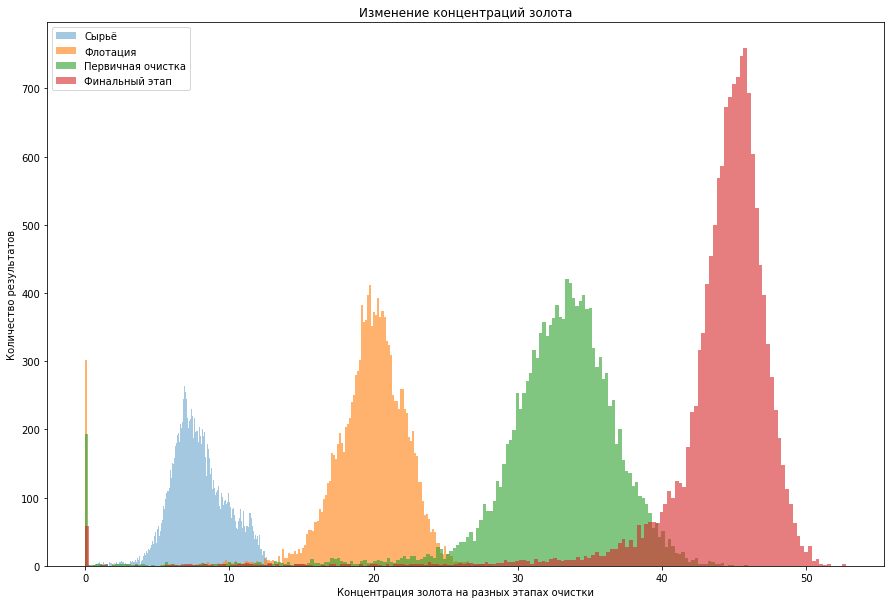

In [20]:
# гистограмма для золота
plt.figure(figsize = [15, 10])

plt.hist(data_train['rougher.input.feed_au'], alpha = 0.4, bins = 200, label = 'Сырьё')
plt.hist(data_train['rougher.output.concentrate_au'], alpha = 0.6, bins = 200, label = 'Флотация')
plt.hist(data_train['primary_cleaner.output.concentrate_au'], alpha = 0.6, bins = 200, label = 'Первичная очистка')
plt.hist(data_train['final.output.concentrate_au'], alpha = 0.6, bins = 200, label = 'Финальный этап')

plt.xlabel("Концентрация золота на разных этапах очистки")
plt.ylabel("Количество результатов")

plt.title('Изменение концентраций золота')
plt.legend()
plt.show()

У золота концентрация растёт последовательно на каждом этапе очистки.

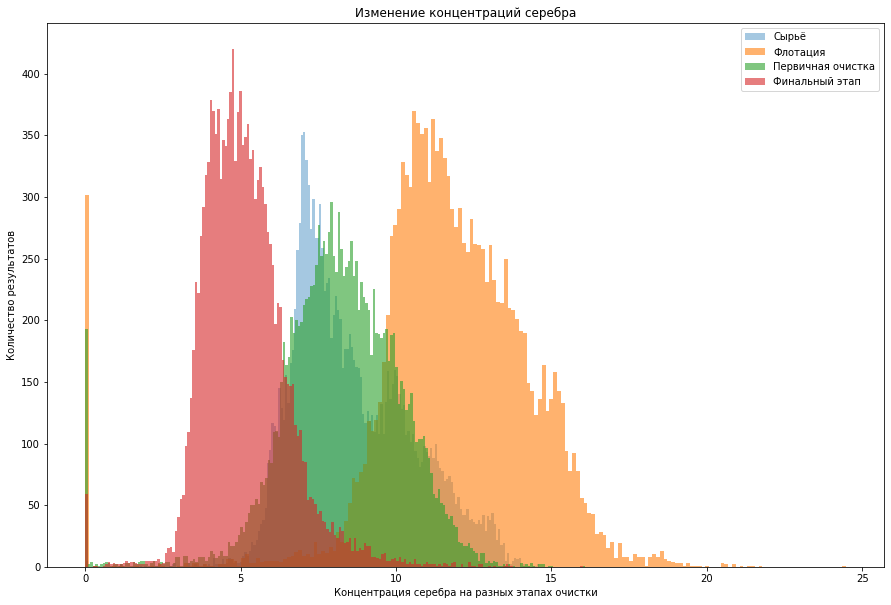

In [21]:
# гистограмма для серебра
plt.figure(figsize = [15, 10])

plt.hist(data_train['rougher.input.feed_ag'], alpha = 0.4, bins = 200, label = 'Сырьё')
plt.hist(data_train['rougher.output.concentrate_ag'], alpha = 0.6, bins = 200, label = 'Флотация')
plt.hist(data_train['primary_cleaner.output.concentrate_ag'], alpha = 0.6, bins = 200, label = 'Первичная очистка')
plt.hist(data_train['final.output.concentrate_ag'], alpha = 0.6, bins = 200, label = 'Финальный этап')


plt.xlabel("Концентрация серебра на разных этапах очистки")
plt.ylabel("Количество результатов")

plt.title('Изменение концентраций серебра')
plt.legend()
plt.show()


У серебра концентрация растёт на этапе флотации, а потом последовательно падает на следующих этапах.

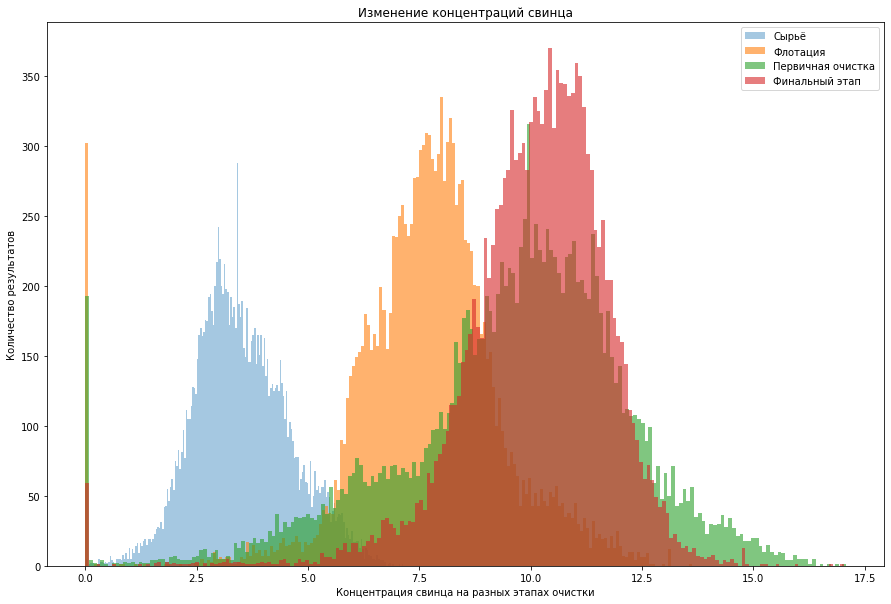

In [22]:
# гистограмма для свинца
plt.figure(figsize = [15, 10])

plt.hist(data_train['rougher.input.feed_pb'], alpha = 0.4, bins = 200, label = 'Сырьё')
plt.hist(data_train['rougher.output.concentrate_pb'], alpha = 0.6, bins = 200, label = 'Флотация')
plt.hist(data_train['primary_cleaner.output.concentrate_pb'], alpha = 0.6, bins = 200, label = 'Первичная очистка')
plt.hist(data_train['final.output.concentrate_pb'], alpha = 0.6, bins = 200, label = 'Финальный этап')


plt.xlabel("Концентрация свинца на разных этапах очистки")
plt.ylabel("Количество результатов")

plt.title('Изменение концентраций свинца')
plt.legend()
plt.show()

У свинца концентрация значительно растёт на каждом этапе флотации, затем слегка растёт на этапе первичной очистки и на финальном этапе.

### Сравнение гранул

Размел гранул сырья хранится в параметре этапа `feed_size`. Этот параметр присутствует в двух этапах - `rougher.input.feed_size` и `primary_cleaner.input.feed_size`. Сравним два этих параметра в тестовой и обучающей выборках. 

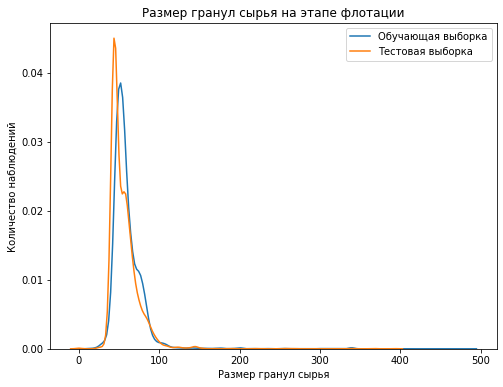

In [23]:
plt.figure(figsize = [8, 6])

x = data_train['rougher.input.feed_size']
y = data_test['rougher.input.feed_size']

sns.kdeplot(x, label = 'Обучающая выборка');
sns.kdeplot(y, label = 'Тестовая выборка');

plt.xlabel('Размер гранул сырья')
plt.ylabel('Количество наблюдений')
plt.title('Размер гранул сырья на этапе флотации');

plt.legend();
plt.show();

Для этапа флотации размер гранул на обучающей выборке находится в районе 50, для тестовой - в районе 40.

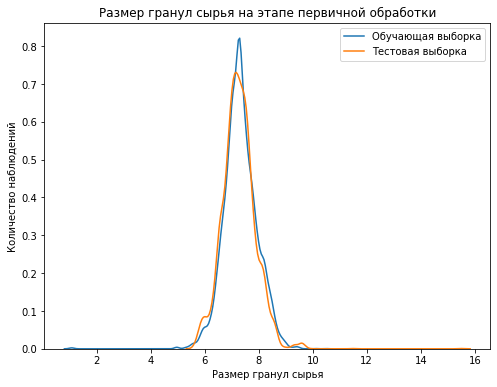

In [24]:
plt.figure(figsize = [8, 6])

x = data_train['primary_cleaner.input.feed_size']
y = data_test['primary_cleaner.input.feed_size']

sns.kdeplot(x, label = 'Обучающая выборка');
sns.kdeplot(y, label = 'Тестовая выборка');

plt.xlabel('Размер гранул сырья')
plt.ylabel('Количество наблюдений')
plt.title('Размер гранул сырья на этапе первичной обработки');

plt.legend();
plt.show();

Для этапа флотации размер гранул находится в районе 7-8 как на обучающей выборке, так и на тестовой.

Размеры гранул на обеих рассматриваемых стадиях почти не различаются в рамках сравнения между тестовой и обучающей выборками. На этапе первичной обработки значения распределены нормально в обеих выборках. 


На этапе флотации для обучающей выборки значения данных с размером гранул также распределены нормально. А вот для тестовой выборки данные распределены со смещением вправо.

### Сравнение суммарных концентраций

Для удобства сделаем функцию, которая считает концентрацию в трёх состояниях - сырьё, черновой и финальный концентраты, для каждого вещества.

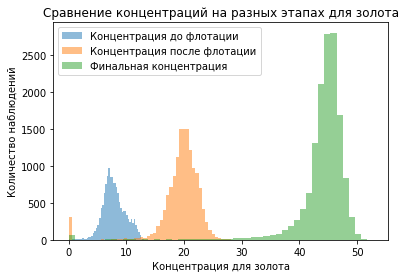

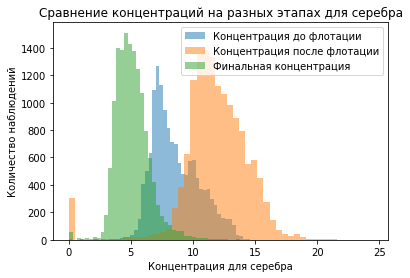

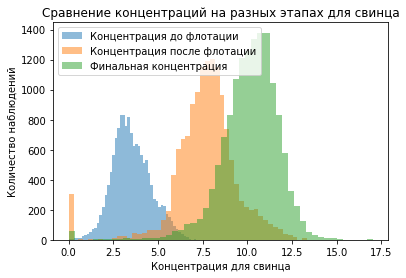

In [25]:
for metal_name in ['au', 'ag', 'pb']:
    name = ''
    if metal_name == 'au':
        name = 'золота'
        
    if metal_name == 'ag':
        name = 'серебра'
        
    if metal_name == 'pb':
        name = 'свинца'
        
        
    concentration_rougher_input = data_train[f'rougher.input.feed_{metal_name}']
    concentration_rougher_output = data_train[f'rougher.output.concentrate_{metal_name}']
    concentration_final_output = data_train[f'final.output.concentrate_{metal_name}']
    
    plt.hist(concentration_rougher_input, label = 'Концентрация до флотации', bins = 50, alpha = 0.5)
    plt.hist(concentration_rougher_output, label = 'Концентрация после флотации', bins = 50, alpha = 0.5)
    plt.hist(concentration_final_output, label = 'Финальная концентрация', bins = 50, alpha = 0.5)
    
    
    plt.xlabel(f'Концентрация для {name}')
    plt.ylabel('Количество наблюдений')
    
    
    plt.title(f'Сравнение концентраций на разных этапах для {name}');
    plt.legend()
    plt.show();

У золота и свинца концентрация последовательно увеличивается. У серебра концентрация увеличилась, а потом сильно упала. Из гистограмм видно очень много нулевых значений, которые для параметра концентрации являются аномальными значениями. Их нужно удалить, чтобы они не влияли негативно на обучение модели.

In [26]:
data_train = data_train.drop(data_train[data_train['final.output.concentrate_au'] == 0].index)
data_train = data_train.drop(data_train[data_train['final.output.concentrate_ag'] == 0].index)
data_train = data_train.drop(data_train[data_train['final.output.concentrate_pb'] == 0].index)

data_train = data_train.drop(data_train[data_train['rougher.output.concentrate_au'] == 0].index)
data_train = data_train.drop(data_train[data_train['rougher.output.concentrate_ag'] == 0].index)
data_train = data_train.drop(data_train[data_train['rougher.output.concentrate_pb'] == 0].index)

In [27]:
data_full = data_full.drop(data_full[data_full['final.output.concentrate_au'] == 0].index)
data_full = data_full.drop(data_full[data_full['final.output.concentrate_ag'] == 0].index)
data_full = data_full.drop(data_full[data_full['final.output.concentrate_pb'] == 0].index)

data_full = data_full.drop(data_full[data_full['rougher.output.concentrate_au'] == 0].index)
data_full = data_full.drop(data_full[data_full['rougher.output.concentrate_ag'] == 0].index)
data_full = data_full.drop(data_full[data_full['rougher.output.concentrate_pb'] == 0].index)

**Вывод:**

* Были исследованы изменения концентраций трёх металлов (Au, Ag, Pb) на различных этапах очистки.
* Было проведено сравнение размеров гранул. Между обучающей и тестовой выборками не было выявлено разницы в результатах.
* Была исследована концентрация трёх металлов (Au, Ag, Pb) на разных стадиях.
* Были найдены и обработаны аномалии. Данные готовы к обучению.

## Модель

### Инициализация функции для вычисления sMAPE

In [28]:
def calculate_smape(target, predict):
    smape = (1 / len(target)) * np.sum((np.abs(target - predict)) / ((np.abs(target) + np.abs(predict)) / 2)) * 100
    return smape

In [29]:
def calculate_result_smape(rougher, final):
    result_smape = 0.25 * rougher + 0.75 * final
    return result_smape

Так как мы использовали слияние данных из двух таблиц, чтобы добавить в тестовую выборку недостающие признаки для проведения необходимых исследований и вычисления эффективности обогащения, то перед обучением будет лучше убрать из датасета все эти признаки, которые отсутствовали в тестовой выборке, оставив лишь два целевых признака - `rougher.output.recovery` и `final.output.recovery`. В противном случае может произойти утечка признаков при обучении моделей.

In [30]:
missing_features.discard('rougher.output.recovery')
missing_features.discard('final.output.recovery')

In [31]:
print(len(missing_features))

32


In [32]:
data_train = data_train.drop(columns = missing_features, axis = 1)

In [33]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13795 entries, 0 to 14148
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   final.output.recovery                       13795 non-null  float64
 1   primary_cleaner.input.sulfate               13795 non-null  float64
 2   primary_cleaner.input.depressant            13795 non-null  float64
 3   primary_cleaner.input.feed_size             13795 non-null  float64
 4   primary_cleaner.input.xanthate              13795 non-null  float64
 5   primary_cleaner.state.floatbank8_a_air      13795 non-null  float64
 6   primary_cleaner.state.floatbank8_a_level    13795 non-null  float64
 7   primary_cleaner.state.floatbank8_b_air      13795 non-null  float64
 8   primary_cleaner.state.floatbank8_b_level    13795 non-null  float64
 9   primary_cleaner.state.floatbank8_c_air      13795 non-null  float64
 10  primary_cl

### Обучение моделей

Подготовим выборки, причём для каждого из двух целевых признаков будут отдельные выборки.

In [34]:
features_train = data_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
rougher_target_train = data_train['rougher.output.recovery']
final_target_train = data_train['final.output.recovery']

Будем сравнивать три модели - дерево решений, случайный лес и линейную регрессию. Чем меньше показатель sMAPE - тем лучше.

In [35]:
best_smape_dt = 100 # ставим максимально возможное значение
best_depth_dt = 0

for depth in range(1, 20, 2):
    model_dt_rougher = DecisionTreeRegressor(max_depth = depth, random_state = 12345)
    smape_rougher = cross_val_score(model_dt_rougher, features_train, rougher_target_train, n_jobs=-1, verbose=10,
                                    scoring = make_scorer(calculate_smape, greater_is_better = False), cv = 5)
    total_smape_rougher = smape_rougher.mean()

    model_dt_final = DecisionTreeRegressor(max_depth = depth, random_state = 12345)
    smape_final = cross_val_score(model_dt_final, features_train, final_target_train, n_jobs=-1, verbose=10,
                                  scoring = make_scorer(calculate_smape, greater_is_better = False), cv = 5)
    final_smape_final = smape_final.mean()
    
    
    result_smape = calculate_result_smape(total_smape_rougher, final_smape_final)*(-1)
    
    if result_smape < best_smape_dt:
        best_smape_dt = result_smape
        best_depth_dt = depth
        
print('Лучшее значение sMAPE дерева решений равно', round(best_smape_dt, 2), 'при максимальной глубине равной', best_depth_dt)

[CV] START .....................................................................
[CV] END .............................. score: (test=-11.695) total time=   0.1s
[CV] START .....................................................................
[CV] END ............................... score: (test=-7.700) total time=   0.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s


[CV] END ............................... score: (test=-5.309) total time=   0.1s
[CV] START .....................................................................
[CV] END ............................... score: (test=-6.718) total time=   0.1s
[CV] START .....................................................................
[CV] END ............................... score: (test=-9.052) total time=   0.1s
[CV] START .....................................................................
[CV] END ............................... score: (test=-9.691) total time=   0.1s
[CV] START .....................................................................
[CV] END ............................... score: (test=-8.062) total time=   0.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] END .............................. score: (test=-10.200) total time=   0.1s
[CV] START .....................................................................
[CV] END .............................. score: (test=-10.759) total time=   0.1s
[CV] START .....................................................................
[CV] END .............................. score: (test=-11.351) total time=   0.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .............................. score: (test=-10.580) total time=   0.2s
[CV] START .....................................................................
[CV] END ............................... score: (test=-6.049) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] END ............................... score: (test=-5.568) total time=   0.1s
[CV] START .....................................................................
[CV] END ............................... score: (test=-5.417) total time=   0.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s


[CV] END ............................... score: (test=-7.706) total time=   0.2s
[CV] START .....................................................................
[CV] END ............................... score: (test=-9.708) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] END ............................... score: (test=-8.388) total time=   0.2s
[CV] START .....................................................................
[CV] END .............................. score: (test=-11.457) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s


[CV] END ............................... score: (test=-9.186) total time=   0.2s
[CV] START .....................................................................
[CV] END ............................... score: (test=-9.938) total time=   0.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .............................. score: (test=-10.881) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] END ............................... score: (test=-9.616) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] END ............................... score: (test=-5.545) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s


[CV] END ............................... score: (test=-4.932) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.9s remaining:    0.0s


[CV] END ............................... score: (test=-6.840) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.718) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] END ............................... score: (test=-9.756) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] END .............................. score: (test=-10.282) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s


[CV] END ............................... score: (test=-9.161) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.0s remaining:    0.0s


[CV] END .............................. score: (test=-12.014) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .............................. score: (test=-11.388) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] END .............................. score: (test=-12.383) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] END ............................... score: (test=-5.661) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s


[CV] END ............................... score: (test=-6.324) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.2s remaining:    0.0s


[CV] END ............................... score: (test=-7.019) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .............................. score: (test=-11.917) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] END .............................. score: (test=-11.541) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] END .............................. score: (test=-13.751) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s


[CV] END ............................... score: (test=-9.658) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.3s remaining:    0.0s


[CV] END .............................. score: (test=-15.058) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .............................. score: (test=-11.087) total time=   0.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] END .............................. score: (test=-10.234) total time=   0.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV] END ............................... score: (test=-6.456) total time=   0.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.2s remaining:    0.0s


[CV] END ............................... score: (test=-6.572) total time=   0.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.5s remaining:    0.0s


[CV] END ............................... score: (test=-6.656) total time=   0.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .............................. score: (test=-12.444) total time=   0.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] END .............................. score: (test=-13.128) total time=   0.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV] END .............................. score: (test=-13.714) total time=   0.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.2s remaining:    0.0s


[CV] END .............................. score: (test=-10.413) total time=   0.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.6s remaining:    0.0s


[CV] END .............................. score: (test=-16.609) total time=   0.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .............................. score: (test=-11.492) total time=   0.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] END .............................. score: (test=-13.805) total time=   0.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV] END ............................... score: (test=-7.568) total time=   0.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.3s remaining:    0.0s


[CV] END ............................... score: (test=-7.037) total time=   0.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.8s remaining:    0.0s


[CV] END ............................... score: (test=-6.871) total time=   0.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .............................. score: (test=-13.004) total time=   0.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] END .............................. score: (test=-14.682) total time=   0.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV] END .............................. score: (test=-18.746) total time=   0.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.4s remaining:    0.0s


[CV] END .............................. score: (test=-11.314) total time=   0.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.8s remaining:    0.0s


[CV] END .............................. score: (test=-18.645) total time=   0.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .............................. score: (test=-11.154) total time=   0.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] END .............................. score: (test=-12.255) total time=   0.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV] END ............................... score: (test=-6.632) total time=   0.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.5s remaining:    0.0s


[CV] END ............................... score: (test=-7.863) total time=   0.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.0s remaining:    0.0s


[CV] END ............................... score: (test=-7.055) total time=   0.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .............................. score: (test=-14.582) total time=   0.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] END .............................. score: (test=-12.873) total time=   0.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV] END .............................. score: (test=-21.154) total time=   0.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.7s remaining:    0.0s


[CV] END .............................. score: (test=-11.045) total time=   0.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.2s remaining:    0.0s


[CV] END .............................. score: (test=-18.321) total time=   0.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .............................. score: (test=-13.069) total time=   0.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] END .............................. score: (test=-12.551) total time=   0.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV] END ............................... score: (test=-6.671) total time=   0.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.9s remaining:    0.0s


[CV] END ............................... score: (test=-6.967) total time=   0.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.6s remaining:    0.0s


[CV] END ............................... score: (test=-7.406) total time=   0.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .............................. score: (test=-16.002) total time=   0.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] END .............................. score: (test=-13.159) total time=   0.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV] END .............................. score: (test=-20.408) total time=   0.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.8s remaining:    0.0s


[CV] END .............................. score: (test=-12.789) total time=   0.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.4s remaining:    0.0s


[CV] END .............................. score: (test=-19.938) total time=   0.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .............................. score: (test=-11.595) total time=   0.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] END .............................. score: (test=-12.083) total time=   0.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV] END ............................... score: (test=-6.702) total time=   0.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.8s remaining:    0.0s


[CV] END ............................... score: (test=-8.480) total time=   0.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.4s remaining:    0.0s


[CV] END ............................... score: (test=-7.629) total time=   0.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .............................. score: (test=-17.663) total time=   0.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] END .............................. score: (test=-15.335) total time=   0.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV] END .............................. score: (test=-23.279) total time=   0.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.8s remaining:    0.0s


[CV] END .............................. score: (test=-12.498) total time=   0.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.4s remaining:    0.0s


[CV] END .............................. score: (test=-19.405) total time=   0.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .............................. score: (test=-12.036) total time=   0.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] END .............................. score: (test=-12.133) total time=   0.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV] END ............................... score: (test=-6.906) total time=   0.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.8s remaining:    0.0s


[CV] END ............................... score: (test=-8.348) total time=   0.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.4s remaining:    0.0s


[CV] END ............................... score: (test=-8.153) total time=   0.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .............................. score: (test=-16.864) total time=   0.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] END .............................. score: (test=-16.302) total time=   0.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV] END .............................. score: (test=-21.013) total time=   0.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.1s remaining:    0.0s


[CV] END .............................. score: (test=-12.354) total time=   0.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.8s remaining:    0.0s


[CV] END .............................. score: (test=-19.280) total time=   0.7s
Лучшее значение sMAPE дерева решений равно 9.07 при максимальной глубине равной 3


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.5s finished


In [36]:
%%time

best_smape_rf = 100
best_estimators = 0
best_depth_rf = 0

for estimators in range(10, 100, 30):
    for depth in range(1, 20, 2):
        model_rf_rougher = RandomForestRegressor(n_estimators = estimators, max_depth = depth, random_state = 12345)
        smape_rougher = cross_val_score(model_rf_rougher, features_train, rougher_target_train, n_jobs=-1, verbose=10,
                                        scoring = make_scorer(calculate_smape, greater_is_better = False), cv = 5)
        final_smape_rougher = smape_rougher.mean()

        model_rf_final = RandomForestRegressor(n_estimators = estimators, max_depth = depth, random_state = 12345)
        smape_final = cross_val_score(model_rf_final, features_train, final_target_train, n_jobs=-1, verbose=10,
                                      scoring = make_scorer(calculate_smape, greater_is_better = False), cv = 5)
        final_smape_final = smape_final.mean()
        
        
        result_smape = calculate_result_smape(final_smape_rougher, final_smape_final) * (-1)

        if result_smape < best_smape_rf:
            best_smape_rf = result_smape
            best_estimators = estimators
            best_depth_rf = depth
            
print('Лучшее значение sMAPE случайного леса равно', round(best_smape_rf, 2), 'при максимальной глубине равной', best_depth_rf, 'и количестве деревьев', best_estimators)

[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .............................. score: (test=-10.322) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] END ............................... score: (test=-7.163) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV] END ............................... score: (test=-5.076) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s


[CV] END ............................... score: (test=-7.043) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.4s remaining:    0.0s


[CV] END ............................... score: (test=-8.742) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.619) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] END ............................... score: (test=-8.052) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV] END ............................... score: (test=-9.667) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s


[CV] END .............................. score: (test=-10.424) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.4s remaining:    0.0s


[CV] END .............................. score: (test=-11.403) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.169) total time=   0.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] END ............................... score: (test=-6.419) total time=   0.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


[CV] END ............................... score: (test=-5.105) total time=   0.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.7s remaining:    0.0s


[CV] END ............................... score: (test=-5.543) total time=   0.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.6s remaining:    0.0s


[CV] END ............................... score: (test=-7.811) total time=   0.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.5s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.629) total time=   0.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] END ............................... score: (test=-8.027) total time=   0.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


[CV] END .............................. score: (test=-10.276) total time=   0.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.8s remaining:    0.0s


[CV] END ............................... score: (test=-9.091) total time=   1.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.7s remaining:    0.0s


[CV] END .............................. score: (test=-10.312) total time=   0.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.066) total time=   1.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] END ............................... score: (test=-6.443) total time=   1.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    2.8s remaining:    0.0s


[CV] END ............................... score: (test=-5.114) total time=   1.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.2s remaining:    0.0s


[CV] END ............................... score: (test=-4.835) total time=   1.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.6s remaining:    0.0s


[CV] END ............................... score: (test=-8.545) total time=   1.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.236) total time=   1.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] END ............................... score: (test=-8.334) total time=   1.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


[CV] END ............................... score: (test=-9.954) total time=   1.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.4s remaining:    0.0s


[CV] END ............................... score: (test=-8.552) total time=   1.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.8s remaining:    0.0s


[CV] END .............................. score: (test=-10.318) total time=   1.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.103) total time=   1.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV] END ............................... score: (test=-6.419) total time=   1.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    3.9s remaining:    0.0s


[CV] END ............................... score: (test=-5.248) total time=   1.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.8s remaining:    0.0s


[CV] END ............................... score: (test=-5.202) total time=   2.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    7.9s remaining:    0.0s


[CV] END ............................... score: (test=-8.801) total time=   2.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.9s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.067) total time=   2.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] END ............................... score: (test=-8.379) total time=   2.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    3.9s remaining:    0.0s


[CV] END .............................. score: (test=-10.422) total time=   1.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.8s remaining:    0.0s


[CV] END ............................... score: (test=-8.993) total time=   1.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    7.7s remaining:    0.0s


[CV] END .............................. score: (test=-10.260) total time=   2.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.7s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-8.760) total time=   2.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV] END ............................... score: (test=-7.013) total time=   2.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    4.7s remaining:    0.0s


[CV] END ............................... score: (test=-5.428) total time=   2.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.0s remaining:    0.0s


[CV] END ............................... score: (test=-5.514) total time=   2.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    9.3s remaining:    0.0s


[CV] END ............................... score: (test=-8.590) total time=   2.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.7s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.261) total time=   2.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


[CV] END ............................... score: (test=-8.957) total time=   2.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    4.7s remaining:    0.0s


[CV] END ............................... score: (test=-9.875) total time=   2.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.0s remaining:    0.0s


[CV] END ............................... score: (test=-9.182) total time=   2.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    9.3s remaining:    0.0s


[CV] END .............................. score: (test=-10.853) total time=   2.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.7s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-8.988) total time=   2.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


[CV] END ............................... score: (test=-7.356) total time=   2.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    5.6s remaining:    0.0s


[CV] END ............................... score: (test=-5.227) total time=   2.8s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    8.4s remaining:    0.0s


[CV] END ............................... score: (test=-5.576) total time=   2.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   11.1s remaining:    0.0s


[CV] END ............................... score: (test=-9.404) total time=   2.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.7s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.348) total time=   2.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


[CV] END ............................... score: (test=-9.597) total time=   2.8s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    5.5s remaining:    0.0s


[CV] END .............................. score: (test=-10.283) total time=   2.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    8.2s remaining:    0.0s


[CV] END .............................. score: (test=-10.313) total time=   2.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   11.1s remaining:    0.0s


[CV] END .............................. score: (test=-11.150) total time=   2.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.8s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.023) total time=   3.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV] END ............................... score: (test=-6.979) total time=   3.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    6.1s remaining:    0.0s


[CV] END ............................... score: (test=-5.266) total time=   3.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    9.0s remaining:    0.0s


[CV] END ............................... score: (test=-5.546) total time=   3.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   12.1s remaining:    0.0s


[CV] END ............................... score: (test=-9.382) total time=   3.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.2s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.471) total time=   3.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV] END ............................... score: (test=-9.487) total time=   3.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    6.4s remaining:    0.0s


[CV] END .............................. score: (test=-10.351) total time=   3.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    9.5s remaining:    0.0s


[CV] END .............................. score: (test=-10.821) total time=   3.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   12.5s remaining:    0.0s


[CV] END .............................. score: (test=-11.224) total time=   3.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.7s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-8.665) total time=   3.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


[CV] END ............................... score: (test=-6.904) total time=   3.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    6.7s remaining:    0.0s


[CV] END ............................... score: (test=-5.497) total time=   3.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.0s remaining:    0.0s


[CV] END ............................... score: (test=-5.654) total time=   3.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   13.3s remaining:    0.0s


[CV] END ............................... score: (test=-9.099) total time=   3.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.7s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.443) total time=   3.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


[CV] END ............................... score: (test=-9.827) total time=   3.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    7.1s remaining:    0.0s


[CV] END .............................. score: (test=-10.465) total time=   3.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.6s remaining:    0.0s


[CV] END .............................. score: (test=-10.636) total time=   3.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   14.0s remaining:    0.0s


[CV] END .............................. score: (test=-11.144) total time=   3.8s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.8s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-8.529) total time=   3.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


[CV] END ............................... score: (test=-6.732) total time=   3.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    7.0s remaining:    0.0s


[CV] END ............................... score: (test=-5.472) total time=   3.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.5s remaining:    0.0s


[CV] END ............................... score: (test=-5.665) total time=   3.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   13.9s remaining:    0.0s


[CV] END ............................... score: (test=-8.956) total time=   3.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.5s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.596) total time=   3.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


[CV] END ............................... score: (test=-9.357) total time=   3.8s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    7.6s remaining:    0.0s


[CV] END .............................. score: (test=-10.646) total time=   3.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   11.2s remaining:    0.0s


[CV] END .............................. score: (test=-10.607) total time=   4.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   15.3s remaining:    0.0s


[CV] END .............................. score: (test=-11.569) total time=   4.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.4s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-8.569) total time=   3.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


[CV] END ............................... score: (test=-6.605) total time=   3.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    7.3s remaining:    0.0s


[CV] END ............................... score: (test=-5.591) total time=   3.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   11.1s remaining:    0.0s


[CV] END ............................... score: (test=-5.478) total time=   3.8s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   14.9s remaining:    0.0s


[CV] END ............................... score: (test=-9.536) total time=   3.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.6s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.580) total time=   4.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s


[CV] END ............................... score: (test=-9.645) total time=   4.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    8.1s remaining:    0.0s


[CV] END .............................. score: (test=-10.601) total time=   3.8s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   11.9s remaining:    0.0s


[CV] END .............................. score: (test=-10.742) total time=   3.8s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   15.8s remaining:    0.0s


[CV] END .............................. score: (test=-11.599) total time=   4.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.8s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .............................. score: (test=-10.633) total time=   1.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] END ............................... score: (test=-7.273) total time=   1.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


[CV] END ............................... score: (test=-5.014) total time=   1.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.9s remaining:    0.0s


[CV] END ............................... score: (test=-6.796) total time=   1.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.2s remaining:    0.0s


[CV] END ............................... score: (test=-8.750) total time=   1.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.635) total time=   1.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] END ............................... score: (test=-8.052) total time=   1.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


[CV] END ............................... score: (test=-9.657) total time=   1.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.9s remaining:    0.0s


[CV] END .............................. score: (test=-10.621) total time=   1.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.2s remaining:    0.0s


[CV] END .............................. score: (test=-11.372) total time=   1.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.435) total time=   3.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


[CV] END ............................... score: (test=-6.130) total time=   3.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    7.2s remaining:    0.0s


[CV] END ............................... score: (test=-5.181) total time=   3.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.7s remaining:    0.0s


[CV] END ............................... score: (test=-5.604) total time=   3.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   14.4s remaining:    0.0s


[CV] END ............................... score: (test=-7.741) total time=   3.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.669) total time=   3.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


[CV] END ............................... score: (test=-7.928) total time=   3.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    7.3s remaining:    0.0s


[CV] END .............................. score: (test=-10.228) total time=   3.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   11.0s remaining:    0.0s


[CV] END ............................... score: (test=-9.062) total time=   3.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   14.6s remaining:    0.0s


[CV] END .............................. score: (test=-10.562) total time=   3.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.2s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.146) total time=   5.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.6s remaining:    0.0s


[CV] END ............................... score: (test=-6.930) total time=   5.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   11.2s remaining:    0.0s


[CV] END ............................... score: (test=-4.955) total time=   5.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   16.8s remaining:    0.0s


[CV] END ............................... score: (test=-4.998) total time=   5.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   22.3s remaining:    0.0s


[CV] END ............................... score: (test=-7.786) total time=   5.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   27.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   27.9s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.249) total time=   5.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.6s remaining:    0.0s


[CV] END ............................... score: (test=-8.654) total time=   5.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   11.3s remaining:    0.0s


[CV] END ............................... score: (test=-9.526) total time=   5.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   16.9s remaining:    0.0s


[CV] END ............................... score: (test=-8.515) total time=   5.8s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   22.6s remaining:    0.0s


[CV] END .............................. score: (test=-10.284) total time=   5.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   28.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   28.3s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-8.939) total time=   7.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    7.5s remaining:    0.0s


[CV] END ............................... score: (test=-6.924) total time=   7.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   15.0s remaining:    0.0s


[CV] END ............................... score: (test=-4.940) total time=   7.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   22.4s remaining:    0.0s


[CV] END ............................... score: (test=-5.362) total time=   7.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   29.7s remaining:    0.0s


[CV] END ............................... score: (test=-7.894) total time=   7.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   37.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   37.1s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.048) total time=   7.8s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    7.8s remaining:    0.0s


[CV] END ............................... score: (test=-8.560) total time=   8.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   16.0s remaining:    0.0s


[CV] END ............................... score: (test=-9.500) total time=   7.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   23.5s remaining:    0.0s


[CV] END ............................... score: (test=-8.728) total time=   7.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   31.1s remaining:    0.0s


[CV] END .............................. score: (test=-10.365) total time=   7.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   38.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   38.6s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-8.868) total time=   9.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    9.1s remaining:    0.0s


[CV] END ............................... score: (test=-7.116) total time=   9.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   18.1s remaining:    0.0s


[CV] END ............................... score: (test=-5.057) total time=   9.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   27.2s remaining:    0.0s


[CV] END ............................... score: (test=-5.779) total time=   9.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   36.4s remaining:    0.0s


[CV] END ............................... score: (test=-8.181) total time=   9.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   45.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   45.6s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.306) total time=   9.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    9.4s remaining:    0.0s


[CV] END ............................... score: (test=-9.330) total time=   9.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   18.8s remaining:    0.0s


[CV] END ............................... score: (test=-9.231) total time=   9.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   28.0s remaining:    0.0s


[CV] END ............................... score: (test=-8.873) total time=   9.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   37.3s remaining:    0.0s


[CV] END .............................. score: (test=-10.666) total time=   9.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   46.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   46.9s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-8.848) total time=  10.8s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   10.8s remaining:    0.0s


[CV] END ............................... score: (test=-7.947) total time=  10.8s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   21.6s remaining:    0.0s


[CV] END ............................... score: (test=-5.018) total time=  10.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   32.2s remaining:    0.0s


[CV] END ............................... score: (test=-6.061) total time=  10.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   42.9s remaining:    0.0s


[CV] END ............................... score: (test=-8.692) total time=  10.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   53.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   53.5s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.167) total time=  11.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   11.5s remaining:    0.0s


[CV] END ............................... score: (test=-9.377) total time=  11.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   22.7s remaining:    0.0s


[CV] END ............................... score: (test=-9.462) total time=  10.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   33.5s remaining:    0.0s


[CV] END ............................... score: (test=-9.582) total time=  10.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   44.4s remaining:    0.0s


[CV] END .............................. score: (test=-10.904) total time=  10.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   55.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   55.3s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-8.821) total time=  12.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   12.0s remaining:    0.0s


[CV] END ............................... score: (test=-7.514) total time=  12.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   24.7s remaining:    0.0s


[CV] END ............................... score: (test=-5.057) total time=  11.8s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   36.5s remaining:    0.0s


[CV] END ............................... score: (test=-6.208) total time=  11.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   48.4s remaining:    0.0s


[CV] END ............................... score: (test=-8.740) total time=  12.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.188) total time=  12.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   12.7s remaining:    0.0s


[CV] END ............................... score: (test=-9.380) total time=  12.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   25.4s remaining:    0.0s


[CV] END ............................... score: (test=-9.412) total time=  12.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   37.6s remaining:    0.0s


[CV] END ............................... score: (test=-9.988) total time=  12.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   49.9s remaining:    0.0s


[CV] END .............................. score: (test=-10.893) total time=  12.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-8.473) total time=  13.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   13.5s remaining:    0.0s


[CV] END ............................... score: (test=-7.765) total time=  13.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   26.9s remaining:    0.0s


[CV] END ............................... score: (test=-5.017) total time=  12.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   39.8s remaining:    0.0s


[CV] END ............................... score: (test=-6.241) total time=  12.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   52.8s remaining:    0.0s


[CV] END ............................... score: (test=-8.828) total time=  13.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.405) total time=  13.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   13.9s remaining:    0.0s


[CV] END ............................... score: (test=-9.563) total time=  14.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   27.9s remaining:    0.0s


[CV] END ............................... score: (test=-9.290) total time=  13.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   41.3s remaining:    0.0s


[CV] END .............................. score: (test=-10.137) total time=  13.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   54.8s remaining:    0.0s


[CV] END .............................. score: (test=-11.029) total time=  14.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-8.564) total time=  14.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   14.1s remaining:    0.0s


[CV] END ............................... score: (test=-7.873) total time=  14.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   28.1s remaining:    0.0s


[CV] END ............................... score: (test=-5.052) total time=  13.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   41.7s remaining:    0.0s


[CV] END ............................... score: (test=-6.231) total time=  13.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   55.5s remaining:    0.0s


[CV] END ............................... score: (test=-8.586) total time=  13.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.184) total time=  15.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   15.0s remaining:    0.0s


[CV] END ............................... score: (test=-9.379) total time=  15.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   30.3s remaining:    0.0s


[CV] END ............................... score: (test=-9.417) total time=  14.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   45.0s remaining:    0.0s


[CV] END .............................. score: (test=-10.311) total time=  15.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.0min remaining:    0.0s


[CV] END .............................. score: (test=-11.092) total time=  14.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-8.536) total time=  14.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   14.5s remaining:    0.0s


[CV] END ............................... score: (test=-7.318) total time=  14.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   29.3s remaining:    0.0s


[CV] END ............................... score: (test=-5.145) total time=  14.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   44.1s remaining:    0.0s


[CV] END ............................... score: (test=-6.190) total time=  14.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   58.6s remaining:    0.0s


[CV] END ............................... score: (test=-8.873) total time=  14.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.407) total time=  16.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   16.4s remaining:    0.0s


[CV] END ............................... score: (test=-9.610) total time=  16.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   32.8s remaining:    0.0s


[CV] END ............................... score: (test=-9.480) total time=  15.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   48.1s remaining:    0.0s


[CV] END .............................. score: (test=-10.278) total time=  16.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.1min remaining:    0.0s


[CV] END .............................. score: (test=-11.198) total time=  16.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.4min finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .............................. score: (test=-10.806) total time=   2.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


[CV] END ............................... score: (test=-7.292) total time=   2.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    4.7s remaining:    0.0s


[CV] END ............................... score: (test=-5.021) total time=   2.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.0s remaining:    0.0s


[CV] END ............................... score: (test=-6.856) total time=   2.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    9.3s remaining:    0.0s


[CV] END ............................... score: (test=-8.713) total time=   2.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.6s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.637) total time=   2.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV] END ............................... score: (test=-8.047) total time=   2.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    4.5s remaining:    0.0s


[CV] END ............................... score: (test=-9.348) total time=   2.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.8s remaining:    0.0s


[CV] END .............................. score: (test=-10.606) total time=   2.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    9.0s remaining:    0.0s


[CV] END .............................. score: (test=-11.369) total time=   2.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.4s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.564) total time=   6.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    6.6s remaining:    0.0s


[CV] END ............................... score: (test=-6.086) total time=   6.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   12.8s remaining:    0.0s


[CV] END ............................... score: (test=-5.098) total time=   6.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   19.2s remaining:    0.0s


[CV] END ............................... score: (test=-5.566) total time=   6.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   25.7s remaining:    0.0s


[CV] END ............................... score: (test=-7.752) total time=   6.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   32.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   32.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.638) total time=   7.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    7.0s remaining:    0.0s


[CV] END ............................... score: (test=-7.934) total time=   6.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   13.5s remaining:    0.0s


[CV] END ............................... score: (test=-9.851) total time=   6.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   20.0s remaining:    0.0s


[CV] END ............................... score: (test=-9.067) total time=   6.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   26.4s remaining:    0.0s


[CV] END .............................. score: (test=-10.470) total time=   6.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   32.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   32.6s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.197) total time=   9.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    9.9s remaining:    0.0s


[CV] END ............................... score: (test=-6.967) total time=   9.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   19.8s remaining:    0.0s


[CV] END ............................... score: (test=-4.874) total time=  10.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   30.0s remaining:    0.0s


[CV] END ............................... score: (test=-4.970) total time=   9.8s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   39.8s remaining:    0.0s


[CV] END ............................... score: (test=-7.912) total time=   9.8s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   49.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   49.6s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.182) total time=   9.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    9.9s remaining:    0.0s


[CV] END ............................... score: (test=-8.708) total time=  10.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   20.2s remaining:    0.0s


[CV] END ............................... score: (test=-9.322) total time=  10.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   30.2s remaining:    0.0s


[CV] END ............................... score: (test=-8.509) total time=  10.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   40.4s remaining:    0.0s


[CV] END .............................. score: (test=-10.085) total time=  10.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   50.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   50.5s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.049) total time=  13.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   13.1s remaining:    0.0s


[CV] END ............................... score: (test=-6.985) total time=  13.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   26.1s remaining:    0.0s


[CV] END ............................... score: (test=-4.884) total time=  13.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   39.1s remaining:    0.0s


[CV] END ............................... score: (test=-5.295) total time=  13.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   52.4s remaining:    0.0s


[CV] END ............................... score: (test=-8.235) total time=  13.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.058) total time=  13.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   13.3s remaining:    0.0s


[CV] END ............................... score: (test=-9.005) total time=  13.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   26.8s remaining:    0.0s


[CV] END ............................... score: (test=-9.263) total time=  13.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   40.2s remaining:    0.0s


[CV] END ............................... score: (test=-8.789) total time=  14.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   54.2s remaining:    0.0s


[CV] END .............................. score: (test=-10.330) total time=  13.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-8.997) total time=  16.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   16.2s remaining:    0.0s


[CV] END ............................... score: (test=-7.209) total time=  16.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   32.6s remaining:    0.0s


[CV] END ............................... score: (test=-4.981) total time=  16.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   48.7s remaining:    0.0s


[CV] END ............................... score: (test=-5.635) total time=  15.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.1min remaining:    0.0s


[CV] END ............................... score: (test=-8.572) total time=  16.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.3min finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.154) total time=  17.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   17.3s remaining:    0.0s


[CV] END ............................... score: (test=-9.588) total time=  16.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   34.0s remaining:    0.0s


[CV] END ............................... score: (test=-9.162) total time=  16.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   50.3s remaining:    0.0s


[CV] END ............................... score: (test=-8.973) total time=  16.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.1min remaining:    0.0s


[CV] END .............................. score: (test=-10.589) total time=  16.8s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.4min finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-8.977) total time=  18.8s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   18.8s remaining:    0.0s


[CV] END ............................... score: (test=-7.716) total time=  18.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   37.5s remaining:    0.0s


[CV] END ............................... score: (test=-4.867) total time=  19.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   56.7s remaining:    0.0s


[CV] END ............................... score: (test=-5.911) total time=  18.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.3min remaining:    0.0s


[CV] END ............................... score: (test=-8.966) total time=  18.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.6min finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.063) total time=  19.8s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   19.8s remaining:    0.0s


[CV] END ............................... score: (test=-9.679) total time=  19.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   39.7s remaining:    0.0s


[CV] END ............................... score: (test=-9.250) total time=  19.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   59.0s remaining:    0.0s


[CV] END ............................... score: (test=-9.506) total time=  19.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.3min remaining:    0.0s


[CV] END .............................. score: (test=-10.801) total time=  19.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.6min finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-8.938) total time=  21.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   21.5s remaining:    0.0s


[CV] END ............................... score: (test=-7.504) total time=  21.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   43.1s remaining:    0.0s


[CV] END ............................... score: (test=-4.908) total time=  21.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min remaining:    0.0s


[CV] END ............................... score: (test=-6.059) total time=  21.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.4min remaining:    0.0s


[CV] END ............................... score: (test=-9.194) total time=  21.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.8min finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.125) total time=  22.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   22.4s remaining:    0.0s


[CV] END ............................... score: (test=-9.654) total time=  22.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   44.8s remaining:    0.0s


[CV] END ............................... score: (test=-9.275) total time=  21.8s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min remaining:    0.0s


[CV] END ............................... score: (test=-9.861) total time=  21.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.5min remaining:    0.0s


[CV] END .............................. score: (test=-10.818) total time=  22.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.8min finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-8.683) total time=  23.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   23.4s remaining:    0.0s


[CV] END ............................... score: (test=-7.588) total time=  23.4s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   46.7s remaining:    0.0s


[CV] END ............................... score: (test=-4.928) total time=  22.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min remaining:    0.0s


[CV] END ............................... score: (test=-5.982) total time=  22.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.5min remaining:    0.0s


[CV] END ............................... score: (test=-9.184) total time=  22.9s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.9min finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.290) total time=  24.8s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   24.8s remaining:    0.0s


[CV] END ............................... score: (test=-9.613) total time=  24.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   49.5s remaining:    0.0s


[CV] END ............................... score: (test=-9.208) total time=  24.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min remaining:    0.0s


[CV] END ............................... score: (test=-9.990) total time=  24.5s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.6min remaining:    0.0s


[CV] END .............................. score: (test=-10.968) total time=  25.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.1min finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-8.717) total time=  25.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   25.2s remaining:    0.0s


[CV] END ............................... score: (test=-7.791) total time=  25.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   50.5s remaining:    0.0s


[CV] END ............................... score: (test=-4.942) total time=  24.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min remaining:    0.0s


[CV] END ............................... score: (test=-6.082) total time=  24.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.6min remaining:    0.0s


[CV] END ............................... score: (test=-9.012) total time=  24.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.1min finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.207) total time=  26.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   26.6s remaining:    0.0s


[CV] END ............................... score: (test=-9.518) total time=  26.7s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   53.3s remaining:    0.0s


[CV] END ............................... score: (test=-9.376) total time=  25.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.3min remaining:    0.0s


[CV] END .............................. score: (test=-10.043) total time=  25.6s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.7min remaining:    0.0s


[CV] END .............................. score: (test=-11.034) total time=  26.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.2min finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-8.679) total time=  26.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   26.0s remaining:    0.0s


[CV] END ............................... score: (test=-7.357) total time=  26.0s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   52.0s remaining:    0.0s


[CV] END ............................... score: (test=-4.931) total time=  25.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.3min remaining:    0.0s


[CV] END ............................... score: (test=-6.021) total time=  25.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.7min remaining:    0.0s


[CV] END ............................... score: (test=-9.287) total time=  26.1s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.1min finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-9.340) total time=  28.2s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   28.2s remaining:    0.0s


[CV] END ............................... score: (test=-9.687) total time=  28.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   56.5s remaining:    0.0s


[CV] END ............................... score: (test=-9.368) total time=  26.8s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.4min remaining:    0.0s


[CV] END .............................. score: (test=-10.253) total time=  27.3s
[CV] START .....................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.8min remaining:    0.0s


[CV] END .............................. score: (test=-11.034) total time=  28.2s
Лучшее значение sMAPE случайного леса равно 8.57 при максимальной глубине равной 5 и количестве деревьев 70
CPU times: user 47min, sys: 2.37 s, total: 47min 2s
Wall time: 47min 11s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.3min finished


In [37]:
model_lr_rougher = LinearRegression()
smape_rougher = cross_val_score(model_lr_rougher, features_train, rougher_target_train, 
                                scoring = make_scorer(calculate_smape, greater_is_better = False), cv = 5)
final_smape_rougher = smape_rougher.mean()

model_lr_final = LinearRegression()
smape_final = cross_val_score(model_lr_final, features_train, final_target_train, 
                              scoring = make_scorer(calculate_smape, greater_is_better = False), cv = 5)
final_smape_final = smape_final.mean()

best_smape_lr = calculate_result_smape(final_smape_rougher, final_smape_final)*(-1)

In [38]:
print('Лучшее значение sMAPE дерева решений равно', round(best_smape_dt, 2), 'при максимальной глубине равной', best_depth_dt)
print('Лучшее значение sMAPE случайного леса равно', round(best_smape_rf, 2), 'при максимальной глубине равной', best_depth_rf, 'и количеству деревьев равному', best_estimators)
print('Лучшее значение sMAPE линейной регрессии равно', round(best_smape_lr))

Лучшее значение sMAPE дерева решений равно 9.07 при максимальной глубине равной 3
Лучшее значение sMAPE случайного леса равно 8.57 при максимальной глубине равной 5 и количеству деревьев равному 70
Лучшее значение sMAPE линейной регрессии равно 10


Лучше всего себя показала модель дерева решений. Приступим к применению этой модели на тестовой выборке. Для этого разобьём тестовый датасет на выборки.

In [45]:
features_test = data_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
rougher_target_test = data_test['rougher.output.recovery']
final_target_test = data_test['final.output.recovery']

In [46]:
# обучаем модель на первом целевом признаке
rougher_model = RandomForestRegressor(n_estimators = 70, max_depth = 5, random_state = 12345)
rougher_model.fit(features_train, rougher_target_train)
rougher_predicted = rougher_model.predict(features_test)
# обучаем модель на втором целевом признаке
final_model = RandomForestRegressor(n_estimators = 70, max_depth = 5, random_state = 12345)
final_model.fit(features_train, final_target_train)
final_predicted = final_model.predict(features_test)

In [47]:
rougher_smape_test = calculate_smape(rougher_target_test, rougher_predicted)
final_smape_test = calculate_smape(final_target_test, final_predicted)
result_smape = calculate_result_smape(rougher_smape_test, final_smape_test)

print('Значение sMAPE для тестовой выборки дерева решений составляет', result_smape)

Значение sMAPE для тестовой выборки дерева решений составляет 9.324505642274517


### Проверка модели на адекватность

In [42]:
rougher_dummy = DummyRegressor(strategy = "median")
rougher_dummy.fit(features_train, rougher_target_train)
rougher_dummy_predicted = rougher_dummy.predict(features_test)
smape_rougher_dummy = calculate_smape(rougher_target_test, rougher_dummy_predicted)

In [43]:
final_dummy = DummyRegressor(strategy = "median")
final_dummy.fit(features_train, final_target_train)
final_dummy_predicted = final_dummy.predict(features_test)
smape_final_dummy = calculate_smape(final_target_test, final_dummy_predicted)

In [44]:
result_smape = calculate_result_smape(smape_rougher_dummy, smape_final_dummy)

print('Значение sMAPE для тестовой выборки составляет', result_smape)

Значение sMAPE для тестовой выборки составляет 9.43899456364264


Значение sMAPE для обученной модели случайного леса ниже, чем значение sMAPE для константной модели, это говорит об адекватности модели.

**Вывод:**

* Была написана функция для вычисления итоговой sMAPE. 
* Были обучены разные модели - дерево решений, случайный лес и линейная регрессия
* Была выбрана лучшая модель, проверена на тестовой выборке, а также проверена на адекватность

## Вывод

* В качестве лучшей модели была выбрана модель случайного леса, затем проверена на адекватность.
* В ходе работы было замечено изменение концентрации и размера гранул сырья на разных этапах обогащения.